# Decision Trees 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris                  # Test dataset - 4 features
from sklearn.datasets import load_breast_cancer         # Test data - 30 features
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [19]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_name = data.target_names

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

mod_data = np.hstack((y_train.reshape(-1, 1), X_train))
print(f"Dimension of the dataset: {mod_data.shape}")
df_data = pd.DataFrame(
    columns=["target"] + list(feature_names),
    data = np.hstack((y_train.reshape(-1, 1), X_train))
)

df_data.head()

Dimension of the dataset: (381, 31)


,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.0,13.400,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,0.1650,...,14.73,21.70,93.76,663.5,0.1213,0.1676,0.13640,0.06987,0.2741,0.07582
1,0.0,18.050,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,...,22.39,18.91,150.10,1610.0,0.1478,0.5634,0.37860,0.21020,0.3751,0.11080
2,1.0,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.01257,0.2025,...,10.85,31.24,68.73,359.4,0.1526,0.1193,0.06141,0.03770,0.2872,0.08304
3,1.0,13.660,19.13,89.46,575.3,0.09057,0.11470,0.09657,0.04812,0.1848,...,15.14,25.50,101.40,708.8,0.1147,0.3167,0.36600,0.14070,0.2744,0.08839
4,0.0,19.590,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,0.2027,...,26.73,26.39,174.90,2232.0,0.1438,0.3846,0.68100,0.22470,0.3643,0.09223


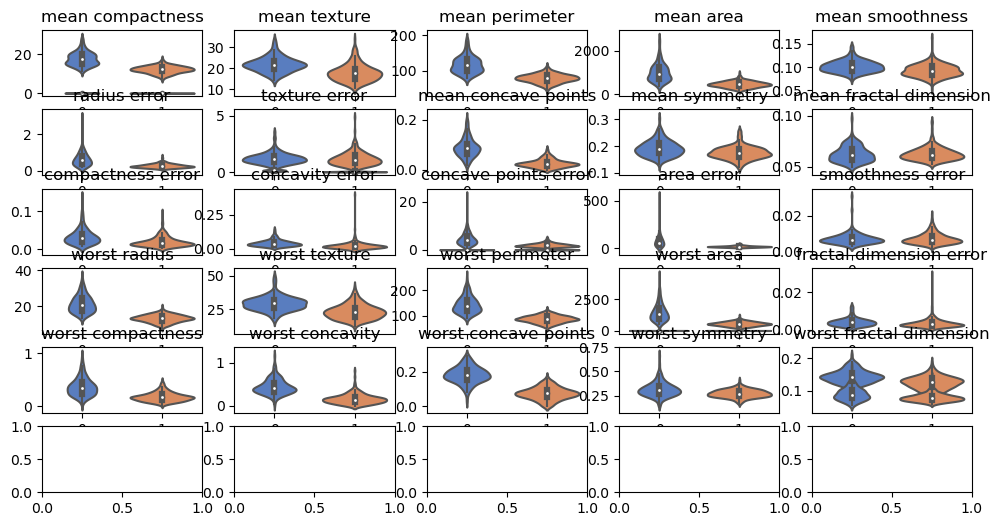

In [21]:
# Data Visualisation
fig, axes = plt.subplots(6, 5, figsize=(12, 6))

for i in range(len(feature_names)):

    row = i // 6
    col = i % 5
    ax = axes[row, col]
    sns.violinplot(x=y_train, y=X_train[:, i], palette="muted", ax=ax)
    ax.set_title(feature_names[i])

[Text(0.54, 0.9375, 'x[22] <= 105.95\nentropy = 0.953\nsamples = 569\nvalue = [212, 357]'),
 Text(0.3, 0.8125, 'x[27] <= 0.135\nentropy = 0.283\nsamples = 345\nvalue = [17, 328]'),
 Text(0.16, 0.6875, 'x[13] <= 48.975\nentropy = 0.097\nsamples = 320\nvalue = [4, 316]'),
 Text(0.08, 0.5625, 'x[21] <= 30.145\nentropy = 0.055\nsamples = 316\nvalue = [2, 314]'),
 Text(0.04, 0.4375, 'entropy = 0.0\nsamples = 274\nvalue = [0, 274]'),
 Text(0.12, 0.4375, 'x[21] <= 30.265\nentropy = 0.276\nsamples = 42\nvalue = [2, 40]'),
 Text(0.08, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16, 0.3125, 'x[27] <= 0.092\nentropy = 0.165\nsamples = 41\nvalue = [1, 40]'),
 Text(0.12, 0.1875, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.2, 0.1875, 'x[25] <= 0.162\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(0.16, 0.0625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.24, 0.0625, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.24, 0.5625, 'x[5] <= 0.063\nent

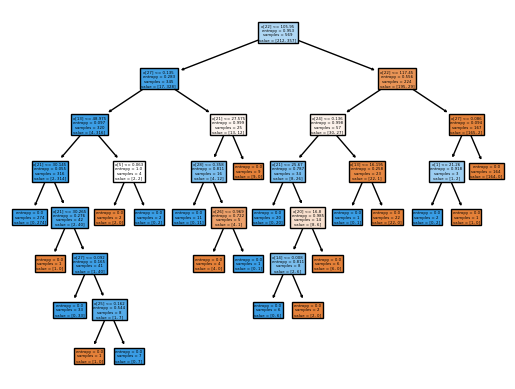

In [22]:
# Fitting the decision tree
model = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best"
)
model = model.fit(X, y)

plot_tree(model, filled=True)

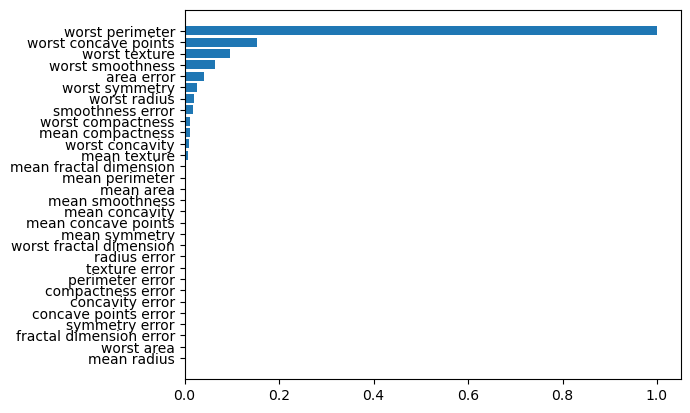

In [31]:
# Feature importance
arr_importance = model.feature_importances_ / max(model.feature_importances_)
idx = np.argsort(arr_importance)
arr_importance = arr_importance[idx]
arr_features = feature_names[idx]

fig, ax = plt.subplots()
ax.barh(np.arange(len(arr_features)), arr_importance)
ax.set_yticks(np.arange(len(arr_features)))
ax.set_yticklabels(arr_features)

plt.show()

Evaluate the performances of the model on the training set

In [39]:
# pred = model.predict(X_train)
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)
print(f"Training set accuracy: {accuracy_train}")
print(f"Testing set accuracy: {accuracy_test}")

Training set accuracy: 1.0
Testing set accuracy: 1.0


Get the features of the tree

In [ ]:
depth = model.get_depth()
n_leaves = model.get_n_leaves()
print(f"Depth of the Tree: {depth}")
print(f"Number of leaves: {n_leaves}")

Depth of the Tree: 7
Number of leaves: 20


Sparser model

[Text(0.5555555555555556, 0.9, 'x[27] <= 0.144\nentropy = 0.947\nsamples = 381\nvalue = [139, 242]'),
 Text(0.3333333333333333, 0.7, 'x[23] <= 929.8\nentropy = 0.408\nsamples = 257\nvalue = [21, 236]'),
 Text(0.2222222222222222, 0.5, 'x[1] <= 21.555\nentropy = 0.148\nsamples = 236\nvalue = [5, 231]'),
 Text(0.1111111111111111, 0.3, 'entropy = 0.0\nsamples = 194\nvalue = [0, 194]'),
 Text(0.3333333333333333, 0.3, 'x[18] <= 0.019\nentropy = 0.527\nsamples = 42\nvalue = [5, 37]'),
 Text(0.2222222222222222, 0.1, 'entropy = 0.811\nsamples = 20\nvalue = [5, 15]'),
 Text(0.4444444444444444, 0.1, 'entropy = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.4444444444444444, 0.5, 'entropy = 0.792\nsamples = 21\nvalue = [16, 5]'),
 Text(0.7777777777777778, 0.7, 'x[22] <= 112.8\nentropy = 0.28\nsamples = 124\nvalue = [118, 6]'),
 Text(0.6666666666666666, 0.5, 'entropy = 0.881\nsamples = 20\nvalue = [14, 6]'),
 Text(0.8888888888888888, 0.5, 'entropy = 0.0\nsamples = 104\nvalue = [104, 0]')]

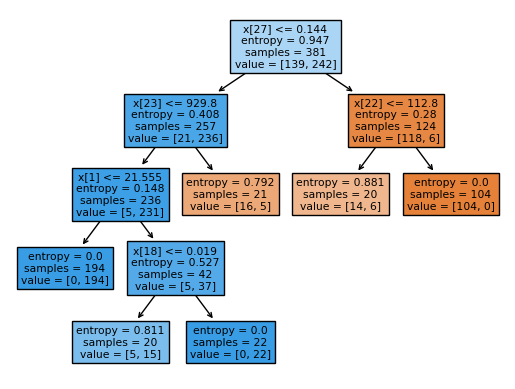

In [42]:
# Create model
sparse_model = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    max_depth=4, 
    min_samples_leaf=20)

# Fit model
sparse_model = sparse_model.fit(X_train, y_train)

# Plot tree
plot_tree(sparse_model, filled=True)

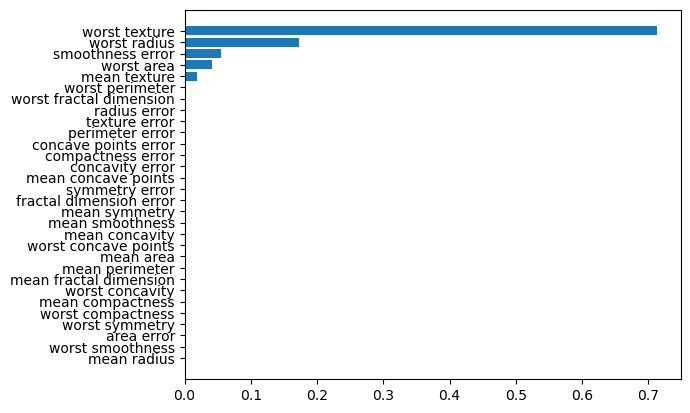

In [ ]:
# Feature importance assessment
arr_importance_sparse = sparse_model.feature_importances_
idx_sparse = np.argsort(arr_importance_sparse)
arr_importance_sparse = arr_importance_sparse[idx_sparse]
arr_features_sparse = arr_features[idx_sparse]

# Plot barchart
fig, ax = plt.subplots()
ax.barh(np.arange((len(arr_importance_sparse))), arr_importance_sparse)
ax.set_yticks(np.arange(len(arr_features_sparse)))
ax.set_yticklabels(arr_features_sparse)


plt.show()

In [44]:
# pred = model.predict(X_train)
accuracy_train = sparse_model.score(X_train, y_train)
accuracy_test = sparse_model.score(X_test, y_test)
print(f"Training set accuracy: {accuracy_train}")
print(f"Testing set accuracy: {accuracy_test}")

Training set accuracy: 0.958005249343832
Testing set accuracy: 0.9308510638297872
